##  <center> DTI 5126: Fundamentals for Applied Data Science </center>
###  <center> Assignment 4 </center>
###  <center> Zeyad Elsayed </center>

## Part A: Association Rules

> ### I.

In [125]:
library(arules)
#library(arulesViz)

In [182]:
df1 <- read.csv('X2.csv', header=FALSE) # setting header to false to include first row

#Reading data as transactions
trans_x <- read.transactions("X2.csv", format = "basket", sep = ",", cols = NULL, header = FALSE)


df1 #looking at the first few rows of the dataset to understand it

Warning message in readLines(file, encoding = encoding):
“incomplete final line found on 'X2.csv'”

V1,V2,V3,V4,V5
A,B,C,D,
A,C,D,F,
C,D,E,G,A
A,D,F,B,
B,C,G,,
D,F,G,,
A,B,G,,
C,D,F,G,


###  a. Find all frequent itemsets in database 

<img src="freq itemstets.png">

#### This image shows the most frequent itemsets, which are the items that had support > min_support. The itemsets that contain 3 items will all be excluded as rules since they all have confidence = 1/8 = 12.5%


### b. Find strong association rules for database 

<img src="association-2 (dragged).tiff">

<img src="association-3 (dragged).tiff">

<img src="association-4 (dragged).tiff">

#### In the above images the support and confidence was checked for all the rules and the rules that passed both checks where circled in red. The result was a set of 24 rules:
 - 1 {A}   => {B}
 - 2 {A}   => {C}
 - 3 {A}   => {D}
 - 4 {B}   => {A}
 - 5 {C}   => {A}
 - 6 {C}   => {D}
 - 7 {C}   => {G}
 - 8 {D}   => {A}
 - 9 {D}   => {C}
 - 10 {D}   => {F}
 - 11 {F}   => {D}
 - 12 {G}   => {C}
 - 13 {G}   => {D}
 - 14 {A,B} => {D}
 - 15 {A,C} => {D}   
 - 16 {A,D} => {C}
 - 17 {A,F} => {D}
 - 18 {B,D} => {A}
 - 19 {C,D} => {A}
 - 20 {C,F} => {D}  
 - 21 {C,G} => {D}
 - 22 {D,G} => {C}
 - 23 {D,G} => {F}
 - 24 {F,G} => {D}

### c. Analyze misleading associations for the rule set obtained in (b).

#### The rules that contain a pair {X,Y} -> Z can be misleading. For example, rule #11 indicates that when F is bought D is bought as well. So in rule #24 it is hard to tell whether D was bought purely because of F alone or because of F and G together. Similarily rule #23 is misleading, since it is hard to tell wheather F was bought because of D alone (rule #10) or because of D and G together. Some other rules like A -> B and  B -> A can also be misleading since this would make it hard to tell which item depends on the other.
------------
------------

> ### II.

In [127]:
df <- read.csv('transactions.csv', header=FALSE) # setting header to false to include first row

#Reading data as transactions
trans <- read.transactions("transactions.csv", format = "basket", sep = ",", cols = NULL,header = FALSE)


head(df, 5) #looking at the first few rows of the dataset to understand it

Warning message in asMethod(object):
“removing duplicated items in transactions”

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
burgers,meatballs,eggs,,,,,,,,,,,,,,,,,
chutney,,,,,,,,,,,,,,,,,,,
turkey,avocado,,,,,,,,,,,,,,,,,,
mineral water,milk,energy bar,whole wheat rice,green tea,,,,,,,,,,,,,,,


In [124]:
inspect(trans[1:5])

    items              
[1] {almonds,          
     antioxydant juice,
     avocado,          
     cottage cheese,   
     energy drink,     
     frozen smoothie,  
     green grapes,     
     green tea,        
     honey,            
     low fat yogurt,   
     mineral water,    
     olive oil,        
     salad,            
     salmon,           
     shrimp,           
     spinach,          
     tomato juice,     
     vegetables mix,   
     whole weat flour, 
     yams}             
[2] {burgers,          
     eggs,             
     meatballs}        
[3] {chutney}          
[4] {avocado,          
     turkey}           
[5] {energy bar,       
     green tea,        
     milk,             
     mineral water,    
     whole wheat rice} 


#### Comparing the first 5 transactions with what we see in the dataframe 'df', the df was successfully converted into transaction. The order of items just changed to alphabetic order in each transaction.

In [126]:
summary(trans)

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

#### The dataset contains 7501 transactions. The top 5 frequent bought items are:
####   -  mineral water
####   - eggs
####   - spaghetti
####   - french fries
####   - chocolate

*****

### a. Generate a plot of the top 10 transactions.

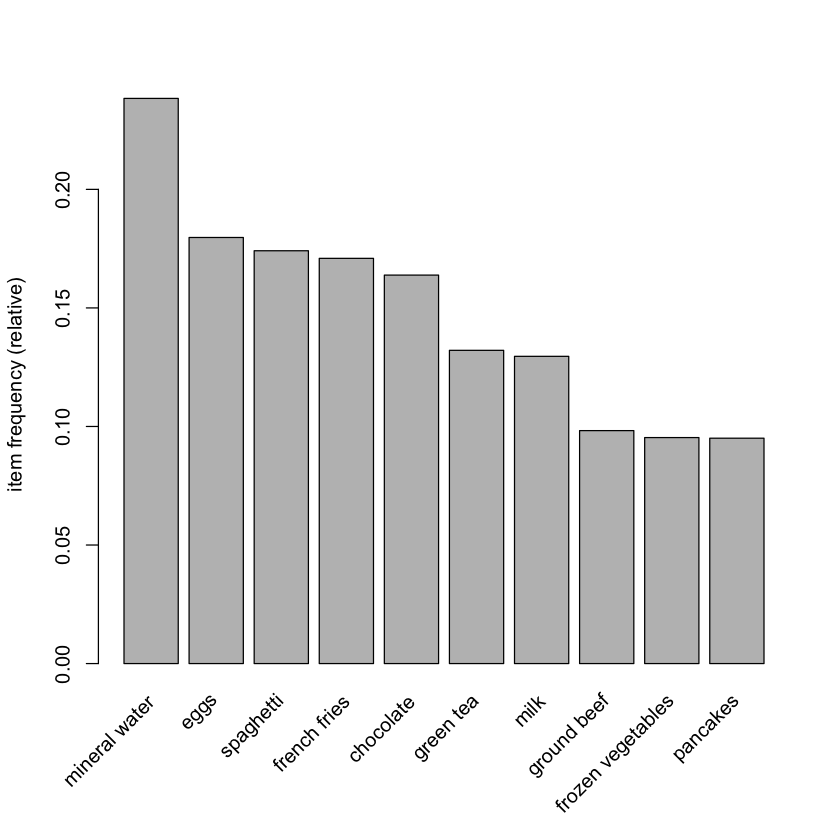

In [202]:
#plot the frequency of items
itemFrequencyPlot(trans, topN = 10)

#### Top 10 frequently bought items represented on a bar graph

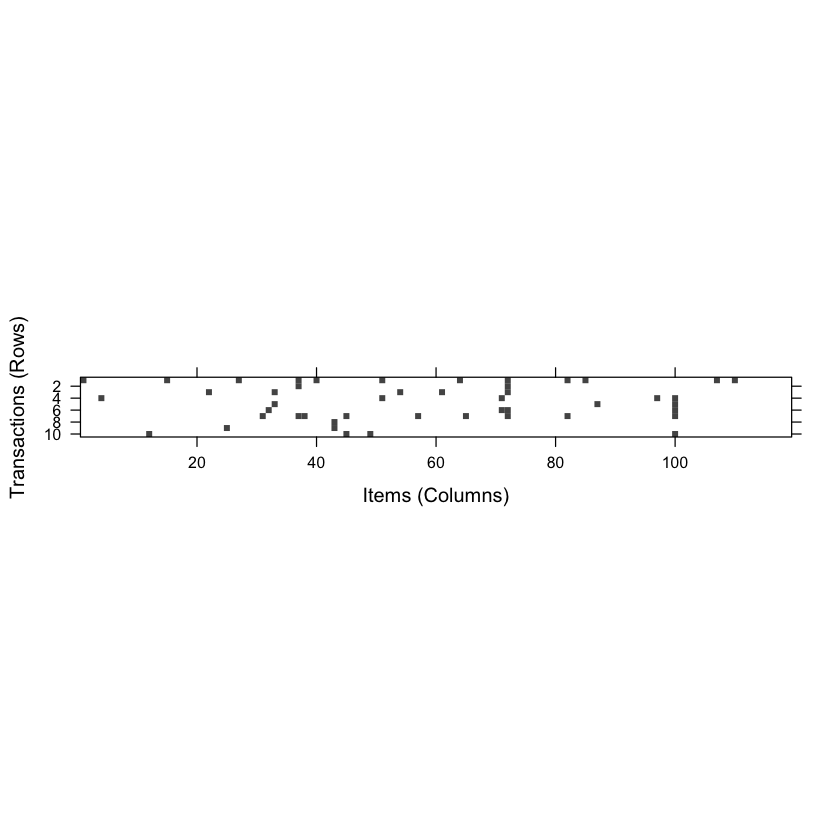

In [209]:
image(sample(trans, 10))

#### A sample of 10 transactions from the dataset

### b. Generate association rules using minimum support of 0.002, minimum confidence of 0.20,and maximum length of 3. Display the rules, sorted by descending lift value.

In [203]:
# set better support and confidence levels to learn more rules
trules <- apriori(trans, parameter = list(support = 0.002, confidence = 0.20, maxlen = 3))
trules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5   0.002      1
 maxlen target   ext
      3  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 15 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [115 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3

Warning message in apriori(trans, parameter = list(support = 0.002, confidence = 0.2, :
“Mining stopped (maxlen reached). Only patterns up to a length of 3 returned!”

 done [0.00s].
writing ... [2023 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 2023 rules 

In [204]:
# look at the first ten rules based on lift
#inspect(trules[1:5])
inspect(sort(trules, by = "lift")[1:10])

     lhs                                    rhs                    support    
[1]  {escalope,mushroom cream sauce}     => {pasta}                0.002532996
[2]  {escalope,pasta}                    => {mushroom cream sauce} 0.002532996
[3]  {mushroom cream sauce,pasta}        => {escalope}             0.002532996
[4]  {parmesan cheese,tomatoes}          => {frozen vegetables}    0.002133049
[5]  {mineral water,whole wheat pasta}   => {olive oil}            0.003866151
[6]  {frozen vegetables,parmesan cheese} => {tomatoes}             0.002133049
[7]  {burgers,herb & pepper}             => {ground beef}          0.002266364
[8]  {light cream,mineral water}         => {chicken}              0.002399680
[9]  {ground beef,shrimp}                => {herb & pepper}        0.002932942
[10] {fromage blanc}                     => {honey}                0.003332889
     confidence lift      count
[1]  0.4418605  28.088096 19   
[2]  0.4318182  22.650826 19   
[3]  0.9500000  11.976387 19   
[4]

#### The following are the top ten strongest association rules with regards to the lift:
 - #### {escalope,mushroom cream sauce}     => {pasta}               
 - ####  {escalope,pasta}                    => {mushroom cream sauce} 
 - ####  {mushroom cream sauce,pasta}        => {escalope}           
 - #### {parmesan cheese,tomatoes}          => {frozen vegetables}  
 - #### {mineral water,whole wheat pasta}   => {olive oil}            
 - #### {frozen vegetables,parmesan cheese} => {tomatoes}             
 - ####  {burgers,herb & pepper}             => {ground beef}          
 - ####  {light cream,mineral water}         => {chicken}              
 - ####  {ground beef,shrimp}                => {herb & pepper}        
 - #### {fromage blanc}                     => {honey} 

### c. Select the rule from Q1with the greatest lift. Compare this rule withthe highest lift rule for maximum length of 2.

In [205]:
trules2 <- apriori(trans, parameter = list(support = 0.002, confidence = 0.20, maxlen = 2))
inspect(sort(trules2, by = "lift")[1:3])

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5   0.002      1
 maxlen target   ext
      2  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 15 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [115 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2

Warning message in apriori(trans, parameter = list(support = 0.002, confidence = 0.2, :
“Mining stopped (maxlen reached). Only patterns up to a length of 2 returned!”

 done [0.01s].
writing ... [358 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                rhs        support     confidence lift     count
[1] {fromage blanc} => {honey}    0.003332889 0.2450980  5.164271 25   
[2] {light cream}   => {chicken}  0.004532729 0.2905983  4.843951 34   
[3] {pasta}         => {escalope} 0.005865885 0.3728814  4.700812 44   


>    |  | Q1 | Q2 |
| --- | --- | --- |
| Rule | escalope, mushroom cream sauce => pasta | fromage blanc => honey |
| Lift | 28.088096 | 5.164271 |
| Support | 0.002532996 | 0.003332889 |

#### According to the table the rule from question 1 has the higher lift, but the rule from question 2 has the higher support. If I was a marketing manager, I would go with the first rule since it has a much greater lift. Also the lift takes into consideration the support as well.  
 - #### $Lift = support / (support(LHS) * support(RHS))$

## Part B Model Evaluation & Performance Improvement: 

### a. First consider a user-based collaborative filter. This requires computing correlations between all student pairs. For which students is it possible to compute correlations with E.N.? Compute them.

<img src="user based cf-1 (dragged).tiff">

#### First the average rating for each user was calculated as seen on the left side. Then the correllation between each student was calculated.

<img src="user based cf-2 (dragged).tiff">

#### All correlations that include JH, DU, FL, GL, AH, SA, BA, RW, MG, AF, and KG are = 0

<img src="user based cf-3 (dragged).tiff">

### b. Based on the single nearest student to E.N., which single course should we recommend to E.N.? Explain why.

#### The student with the highest correlation with EN was LN with a correlation of 0.87. The course with the highest rating that LN took and EN did not take was Python. LN gave Python a rating of 3. Therefore, I would recommend the Python course to EN based on LN's rating.

### c. Use R to compute the cosine similarity between users. 

In [218]:
ratings <- read.csv('ratings.csv')
ratings

Student,SQL,Spatial,PA.1,DM.in.R,Python,Forecast,R.prog,Hadoop,Regression
LN,4,NA,NA,NA,3,2,4,NA,2
MH,3,4,NA,NA,4,NA,NA,NA,NA
JH,2,2,NA,NA,NA,NA,NA,NA,NA
EN,4,NA,NA,4,NA,NA,4,NA,3
DU,4,4,NA,NA,NA,NA,NA,NA,NA
FL,NA,4,NA,NA,NA,NA,NA,NA,NA
GL,NA,4,NA,NA,NA,NA,NA,NA,NA
AH,NA,3,NA,NA,NA,NA,NA,NA,NA
SA,NA,NA,4,NA,NA,NA,NA,NA,NA
RW,NA,NA,2,NA,NA,NA,NA,NA,4


In [245]:
ratings_m <- data.matrix(ratings, rownames.force = NA) #convert df to matrix
ratings_m

Student,SQL,Spatial,PA.1,DM.in.R,Python,Forecast,R.prog,Hadoop,Regression
11,4,NA,NA,NA,3,2,4,NA,2
13,3,4,NA,NA,4,NA,NA,NA,NA
9,2,2,NA,NA,NA,NA,NA,NA,NA
6,4,NA,NA,4,NA,NA,4,NA,3
5,4,4,NA,NA,NA,NA,NA,NA,NA
7,NA,4,NA,NA,NA,NA,NA,NA,NA
8,NA,4,NA,NA,NA,NA,NA,NA,NA
2,NA,3,NA,NA,NA,NA,NA,NA,NA
15,NA,NA,4,NA,NA,NA,NA,NA,NA
14,NA,NA,2,NA,NA,NA,NA,NA,4


In [224]:
ratings_mat = as.matrix(ratings_m[,-1]) #remove student names column
ratings_mat

SQL,Spatial,PA.1,DM.in.R,Python,Forecast,R.prog,Hadoop,Regression
4,NA,NA,NA,3,2,4,NA,2
3,4,NA,NA,4,NA,NA,NA,NA
2,2,NA,NA,NA,NA,NA,NA,NA
4,NA,NA,4,NA,NA,4,NA,3
4,4,NA,NA,NA,NA,NA,NA,NA
NA,4,NA,NA,NA,NA,NA,NA,NA
NA,4,NA,NA,NA,NA,NA,NA,NA
NA,3,NA,NA,NA,NA,NA,NA,NA
NA,NA,4,NA,NA,NA,NA,NA,NA
NA,NA,2,NA,NA,NA,NA,NA,4


In [261]:
library(coop)
library(lsa)
r <- ratings_mat #create copy of matrix
r[is.na(r)] <- 0 #replace NA with 0
tcosine(r)

1.0000000,0.5354529,0.4040610,0.7190319,0.4040610,0.0000000,0.0000000,0.0000000,0.0000000,0.2555506,0.0000000,0.2020305,0.0000000,0.0000000,0.5714286
0.5354529,1.0000000,0.7730207,0.2482286,0.7730207,0.6246950,0.6246950,0.6246950,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.3123475
0.4040610,0.7730207,1.0000000,0.3746343,1.0000000,0.7071068,0.7071068,0.7071068,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.4714045
0.7190319,0.2482286,0.3746343,1.0000000,0.3746343,0.0000000,0.0000000,0.0000000,0.0000000,0.3554093,0.0000000,0.0000000,0.0000000,0.0000000,0.7947194
0.4040610,0.7730207,1.0000000,0.3746343,1.0000000,0.7071068,0.7071068,0.7071068,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.4714045
0.0000000,0.6246950,0.7071068,0.0000000,0.7071068,1.0000000,1.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
0.0000000,0.6246950,0.7071068,0.0000000,0.7071068,1.0000000,1.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
0.0000000,0.6246950,0.7071068,0.0000000,0.7071068,1.0000000,1.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.4472136,1.0000000,0.7071068,1.0000000,1.0000000,0.0000000
0.2555506,0.0000000,0.0000000,0.3554093,0.0000000,0.0000000,0.0000000,0.0000000,0.4472136,1.0000000,0.4472136,0.3162278,0.4472136,0.4472136,0.5962848
0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.4472136,1.0000000,0.7071068,1.0000000,1.0000000,0.0000000


#### This table shows the cosine similarities between the 15 users. Looking at column 4 which represents the user EN (out target) we can see that the highest number in this column is in the last row 0.7947194. This means that EN has the highest cosine similarity with the last user in the table who is DS. The second highest user is the first user LN with a cosine similarity of 0.7190319

### d. Based on the cosine similarities of the nearest students to E.N., which course should be recommended to E.N.?

In [236]:
library(recommenderlab)

ratings_mat = as(ratings_mat, "realRatingMatrix")

#Create Recommender Model. The parameters are UBCF (user based) and Cosine similarity.
rec_mod = Recommender(ratings_mat, method = "UBCF", param=list(method="Cosine",nn=15)) 

#Obtain top 1 recommendation for EN (user 4)
Top_1_pred = predict(rec_mod, ratings_mat[4], n=1)


#Convert the recommendation to a list
Top_1_List = as(Top_1_pred, "list")
Top_1_List

[1] "Python"


#### Based on the cosine similarities of the nearest student to EN the model recommended Python as well. This is based on the second highest cosine similarity user LN. Since the student DS who had the highest cosine similarity took the same courses as EN.

### e. Apply item-based collaborative filtering to this dataset (using R) and based on the results, recommend a course to E.N.

In [238]:
#Create Recommender Model. The parameters are IBCF (item based) and Cosine similarity.
rec_mod2 = Recommender(ratings_mat, method = "IBCF", param=list(method="Cosine",nn=15)) 

#Obtain top 1 recommendation for EN (user 4)
Top_1_pred = predict(rec_mod2, ratings_mat[4], n=1)


#Convert the recommendation to a list
Top_1_List = as(Top_1_pred, "list")
Top_1_List

[1] "Forecast"


#### Based on the cosine similarities but this time using Item-based collaborative filtering instead of user base, the recommended course to EN this time was Forecast.